# Лабораторна робота 9
[Посилання на GitHub](https://github.com/unIns1de/Homework-from-KSVD)

Був присутній на парі

In [1]:
!pip install pyspark==3.5.1

from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .master("local[*]")\
    .appName("Colab_PySpark")\
    .getOrCreate()

In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
    .master("local[*]")\
    .appName("Colab_PySpark")\
    .getOrCreate()

In [4]:
print("Spark version:", spark.version)

Spark version: 3.5.1


In [5]:
import kagglehub

path = kagglehub.dataset_download("dinnymathew/usstockprices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/usstockprices


In [6]:
data = spark.read.csv(
    path + '/stocks_price_final.csv',
    sep=',',
    header=True,
    inferSchema=True
)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [8]:
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DoubleType, DateType


data_schema = [
               StructField('_c0', IntegerType(), True),
               StructField('symbol', StringType(), True),
               StructField('data', DateType(), True),
               StructField('open', DoubleType(), True),
               StructField('high', DoubleType(), True),
               StructField('low', DoubleType(), True),
               StructField('close', DoubleType(), True),
               StructField('volume', IntegerType(), True),
               StructField('adjusted', DoubleType(), True),
               StructField('market.cap', StringType(), True),
               StructField('sector', StringType(), True),
               StructField('industry', StringType(), True),
               StructField('exchange', StringType(), True),
            ]

final_struc = StructType(fields = data_schema)

data = spark.read.csv(
    path + '/stocks_price_final.csv',
    sep=',',
    header=True,
    inferSchema=True
)

data.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- symbol: string (nullable = true)
 |-- date: date (nullable = true)
 |-- open: string (nullable = true)
 |-- high: string (nullable = true)
 |-- low: string (nullable = true)
 |-- close: string (nullable = true)
 |-- volume: string (nullable = true)
 |-- adjusted: string (nullable = true)
 |-- market.cap: string (nullable = true)
 |-- sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- exchange: string (nullable = true)



In [9]:
data.columns

['_c0',
 'symbol',
 'date',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'adjusted',
 'market.cap',
 'sector',
 'industry',
 'exchange']

In [10]:
data = data.withColumn('date_1', data.date)

data.show(5)

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|    date_1|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [11]:
from pyspark.sql.functions import avg

# 1. Обчислити середнє значення для колонки 'open', ігноруючи null
mean_open_value = data.select(avg("open")).first()[0]

# Перевірка, чи середнє було обчислено (може бути None, якщо всі значення null)
if mean_open_value is not None:
# 2. Заповнити пропущені значення (null) у колонці 'open' обчисленим середнім
    data = data.na.fill({"open": mean_open_value})
else:
    print("Не вдалося обчислити середнє для 'open', оскільки всі значення можуть бути null.")

data.show()

+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|_c0|symbol|      date|     open|     high|      low|    close| volume| adjusted|market.cap|       sector|            industry|exchange|    date_1|
+---+------+----------+---------+---------+---------+---------+-------+---------+----------+-------------+--------------------+--------+----------+
|  1|   TXG|2019-09-12|       54|       58|       51|    52.75|7326300|    52.75|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-12|
|  2|   TXG|2019-09-13|    52.75|   54.355|49.150002|    52.27|1025200|    52.27|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-13|
|  3|   TXG|2019-09-16|52.450001|       56|52.009998|55.200001| 269900|55.200001|    $9.31B|Capital Goods|Biotechnology: La...|  NASDAQ|2019-09-16|
|  4|   TXG|2019-09-17|56.209999|60.900002|   55.423|56.779999| 602800|56.779999|    $9.31B|Capital Goods|Biotec

In [12]:
# Вібір одного стовпця
data.select('sector').show(5)

# Вибір декількох стовпців
data.select(['open', 'close', 'adjusted']).show(5)

+-------------+
|       sector|
+-------------+
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
|Capital Goods|
+-------------+
only showing top 5 rows

+---------+---------+---------+
|     open|    close| adjusted|
+---------+---------+---------+
|       54|    52.75|    52.75|
|    52.75|    52.27|    52.27|
|52.450001|55.200001|55.200001|
|56.209999|56.779999|56.779999|
|56.849998|       62|       62|
+---------+---------+---------+
only showing top 5 rows



In [18]:
from pyspark.sql import functions as f

data.select(
    'open',
    'close',
    f.when(data.adjusted >= 200.0, 1).otherwise(0).alias('high_adjusted_flag')
).show(5)

+---------+---------+------------------+
|     open|    close|high_adjusted_flag|
+---------+---------+------------------+
|       54|    52.75|                 0|
|    52.75|    52.27|                 0|
|52.450001|55.200001|                 0|
|56.209999|56.779999|                 0|
|56.849998|       62|                 0|
+---------+---------+------------------+
only showing top 5 rows



In [19]:
data.select(
    'sector',
    data.sector.rlike('^[B,C]').alias('Колонка sector починається з B або C')
).distinct().show()

+--------------------+------------------------------------+
|              sector|Колонка sector починається з B або C|
+--------------------+------------------------------------+
|         Health Care|                               false|
|       Capital Goods|                                true|
|Consumer Non-Dura...|                                true|
|    Public Utilities|                               false|
|   Consumer Durables|                                true|
|             Finance|                               false|
|      Transportation|                               false|
|       Miscellaneous|                               false|
|   Consumer Services|                                true|
|              Energy|                               false|
|    Basic Industries|                                true|
|          Technology|                               false|
+--------------------+------------------------------------+



In [20]:
from pyspark.sql.functions import avg

data.groupBy('industry')\
    .agg(
        avg('open').alias('avg_open'),
        avg('close').alias('avg_close'),
        avg('adjusted').alias('avg_adjusted')
    ).show(30, truncate=False)

+-------------------------------------------------------------+------------------+------------------+------------------+
|industry                                                     |avg_open          |avg_close         |avg_adjusted      |
+-------------------------------------------------------------+------------------+------------------+------------------+
|Finance/Investors Services                                   |5.134401785714286 |5.136630739795919 |4.991354066964286 |
|Miscellaneous                                                |16.38588266938776 |16.35987909030613 |16.148959322959183|
|Investment Bankers/Brokers/Service                           |58.95058094575029 |58.983085960826294|58.157837258903065|
|Food Distributors                                            |43.274508569354644|43.27317810574859 |42.910476083578644|
|Miscellaneous manufacturing industries                       |15.660586409948984|15.65093486096939 |15.369818847193866|
|Ophthalmic Goods               

In [22]:
cols_to_check = ['open', 'close', 'adjusted', 'date']
#data_clean = data.dropna(subset=cols_to_check)

data_clean = data.fillna({'open': -1, 'close': -1, 'adjusted': -1})

In [23]:
from pyspark.sql.functions import col, lit, min, max, avg

data_clean.filter((col('date') >= lit('2019-01-02')) & (col('date') <= lit('2020-01-31')))\
    .groupBy("sector")\
    .agg(
        min("date").alias("С"),
        max("date").alias("По"),

        min("open").alias("Мінімум при відкритті"),
        max("open").alias("Максимум при відкритті"),
        avg("open").alias("Середнє в open"),

        min("close").alias("Мінімум при закритті"),
        max("close").alias("Максимум при закритті"),
        avg("close").alias("Середнє в close"),

        min("adjusted").alias("Скоригований мінімум"),
        max("adjusted").alias("Скоригований максимум"),
        avg("adjusted").alias("Середнє в adjusted")
    )\
    .show(truncate=False)

+---------------------+----------+----------+---------------------+----------------------+------------------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+
|sector               |С         |По        |Мінімум при відкритті|Максимум при відкритті|Середнє в open    |Мінімум при закритті|Максимум при закритті|Середнє в close   |Скоригований мінімум|Скоригований максимум|Середнє в adjusted|
+---------------------+----------+----------+---------------------+----------------------+------------------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+
|Basic Industries     |2019-01-02|2020-01-31|0.277                |NA                    |334814.23540859646|0.272               |NA                   |334289.2550689392 |0.272               |NA                   |331916.3926153813 |
|Capital Goods        |2019-01-02|2020-01-31|0.21               

In [24]:
from pyspark.sql.functions import col, lit, min, max, avg, when, to_date, isnan
from pyspark.sql.types import DoubleType

# Стовпці, які ми будемо використовувати та перетворювати
date_column = "date"
# Числові колонки, які зараз є StringType і потребують перетворення
numeric_columns_to_convert = ["open", "close", "adjusted"]
# Створимо нові імена для очищених числових стовпців
numeric_columns_cleaned = [f"{c}_c" for c in numeric_columns_to_convert]

# 1. Перетворення типів для числових колонок та очищення
data_prepared = data

for original_col, cleaned_col in zip(numeric_columns_to_convert, numeric_columns_cleaned):
    data_prepared = data_prepared.withColumn(
        cleaned_col,
        when(col(original_col).isin("NA", "NaN", "#N/A", "null", "Null", "NULL"), None) # Розширена перевірка на рядкові NA/null
        .otherwise(col(original_col).cast(DoubleType())) # Перетворити на числовий тип
    )

# 2. Фільтрація за датою
data_filtered_by_date = data_prepared.filter(col(date_column).isNotNull()) \
                                     .filter(
                                         (col(date_column) >= lit('2019-01-02')) & \
                                         (col(date_column) <= lit('2020-01-31'))
                                     )

# 2.1 Додатково відфільтруємо NaN та нескінченності з *очищених* числових колонок
data_fully_filtered = data_filtered_by_date
for c_name in numeric_columns_cleaned: # ["open_c", "close_c", "adjusted_c"]
    data_fully_filtered = data_fully_filtered.filter(
        col(c_name).isNotNull() & \
        (~isnan(col(c_name))) & \
        (~col(c_name).isin(float('inf'), float('-inf')))
    )


result_agg = data_fully_filtered.groupBy("sector").agg(
    min(date_column).alias("З"), # Використовуємо оригінальну колонку дати
    max(date_column).alias("По"), # Використовуємо оригінальну колонку дати

    min(numeric_columns_cleaned[0]).alias("Мінімум при відкритті"), # open_c
    max(numeric_columns_cleaned[0]).alias("Максимум при відкритті"), # open_c
    avg(numeric_columns_cleaned[0]).alias("Середнє в open"),       # open_c

    min(numeric_columns_cleaned[1]).alias("Мінімум при закритті"), # close_c
    max(numeric_columns_cleaned[1]).alias("Максимум при закритті"),# close_c
    avg(numeric_columns_cleaned[1]).alias("Середнє в close"),      # close_c

    min(numeric_columns_cleaned[2]).alias("Скоригований мінімум"), # adjusted_c
    max(numeric_columns_cleaned[2]).alias("Скоригований максимум"),# adjusted_c
    avg(numeric_columns_cleaned[2]).alias("Середнє в adjusted")    # adjusted_c
).orderBy("sector") # Додано для послідовного виводу

result_agg.show(truncate=False)

+---------------------+----------+----------+---------------------+----------------------+------------------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+
|sector               |З         |По        |Мінімум при відкритті|Максимум при відкритті|Середнє в open    |Мінімум при закритті|Максимум при закритті|Середнє в close   |Скоригований мінімум|Скоригований максимум|Середнє в adjusted|
+---------------------+----------+----------+---------------------+----------------------+------------------+--------------------+---------------------+------------------+--------------------+---------------------+------------------+
|Basic Industries     |2019-01-02|2020-01-31|0.277                |1.60168176E8          |334814.23540859646|0.272               |1.58376592E8         |334289.2550689392 |0.272               |1.57249392E8         |331916.3926153813 |
|Capital Goods        |2019-01-02|2020-01-31|0.21               

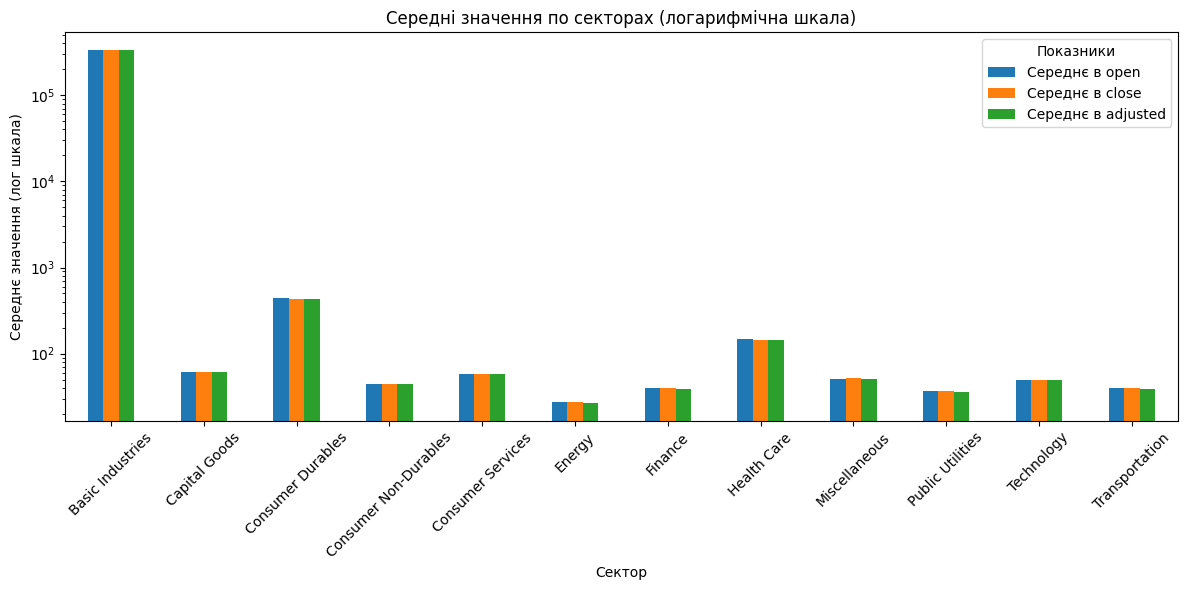

In [25]:
from matplotlib import pyplot as plt

agg_pd = result_agg.toPandas()
agg_pd.set_index('sector', inplace=True)

columns_to_plot = ["Середнє в open", "Середнє в close", "Середнє в adjusted"]

agg_pd[columns_to_plot].plot(kind='bar', figsize=(12, 6), logy=True)

plt.ylabel("Середнє значення (лог шкала)")
plt.xlabel("Сектор")
plt.title("Середні значення по секторах (логарифмічна шкала)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Показники")
plt.show()

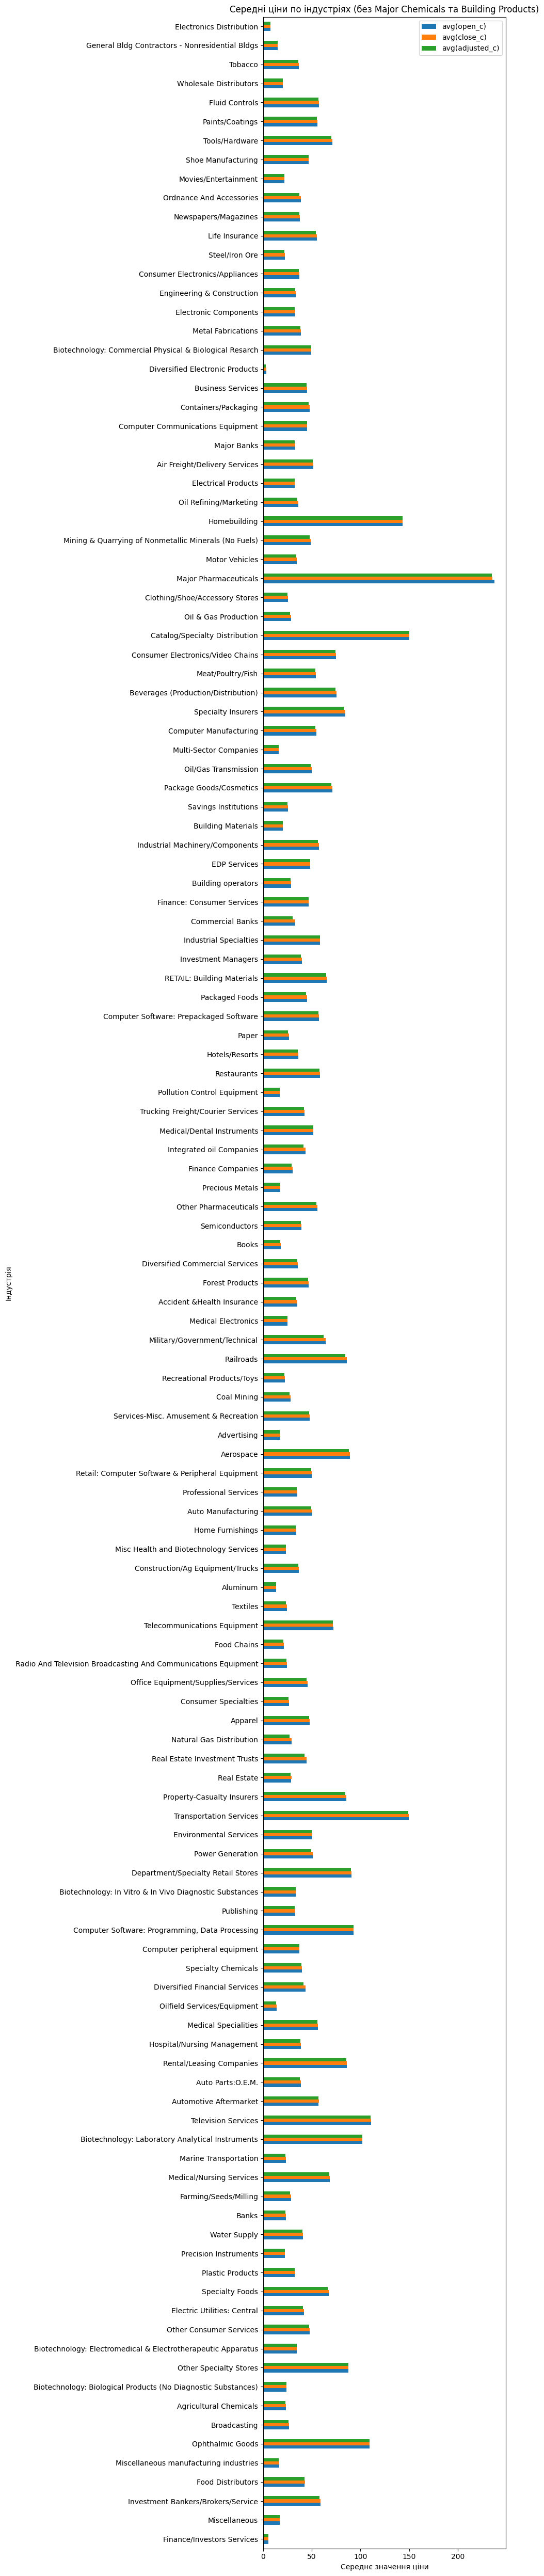

In [26]:
from matplotlib import pyplot as plt

# Агрегація очищених колонок по індустріях
industries_x = data_fully_filtered.select(
    ['industry', 'open_c', 'close_c', 'adjusted_c']
).groupBy('industry').mean().toPandas()

# Фільтрація: виключаємо деякі індустрії для кращої візуалізації
q = industries_x[
    (industries_x['industry'] != 'Major Chemicals') &
    (industries_x['industry'] != 'Building Products')
]

# Горизонтальний bar chart
q.plot(
    kind='barh',
    x='industry',
    y=['avg(open_c)', 'avg(close_c)', 'avg(adjusted_c)'],
    figsize=(10, 50),
    xlabel='Середнє значення ціни',
    ylabel='Індустрія',
    title='Середні ціни по індустріях (без Major Chemicals та Building Products)'
)

plt.tight_layout()
plt.show()

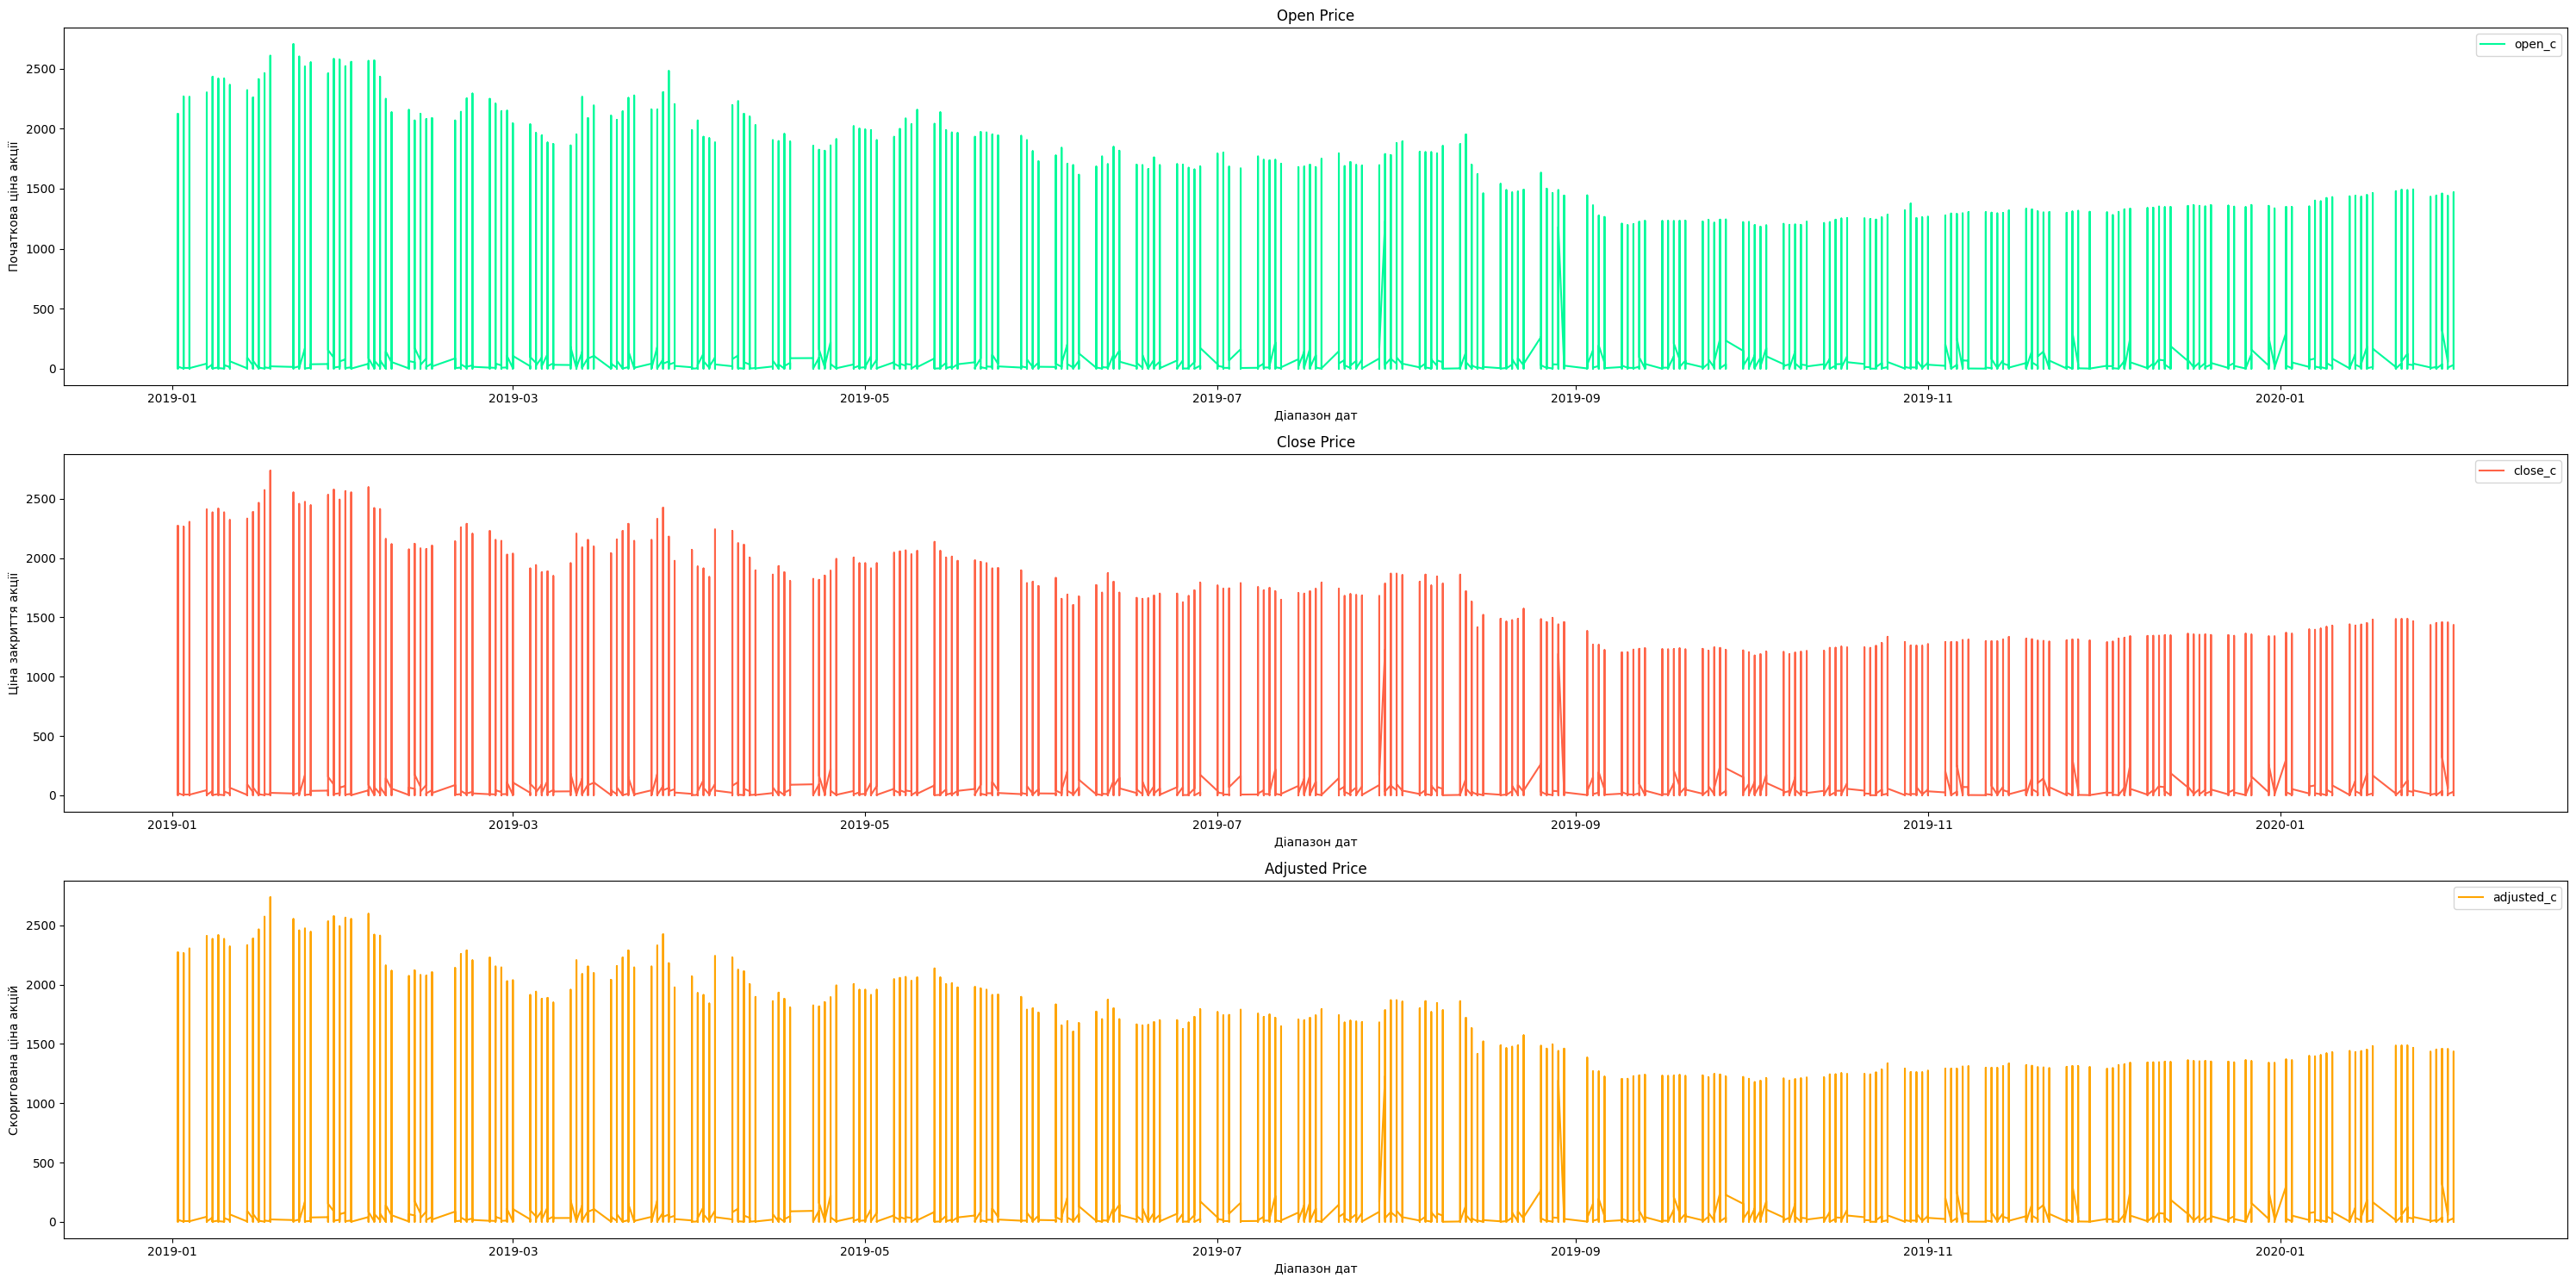

In [27]:

from pyspark.sql.functions import col
from matplotlib import pyplot as plt

# Фільтруємо сектор "Technology" і вибираємо очищені колонки
tech = data_fully_filtered.where(col('sector') == 'Technology') \
                          .select('date', 'open_c', 'close_c', 'adjusted_c')

# Перетворюємо в pandas
tech_pd = tech.toPandas().sort_values('date')

# Створюємо графіки
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(30, 15))

tech_pd.plot(kind='line', x='date', y='open_c',
             xlabel='Діапазон дат', ylabel='Початкова ціна акції',
             ax=axes[0], color='mediumspringgreen', title='Open Price')

tech_pd.plot(kind='line', x='date', y='close_c',
             xlabel='Діапазон дат', ylabel='Ціна закриття акції',
             ax=axes[1], color='tomato', title='Close Price')

tech_pd.plot(kind='line', x='date', y='adjusted_c',
             xlabel='Діапазон дат', ylabel='Скоригована ціна акцій',
             ax=axes[2], color='orange', title='Adjusted Price')

plt.tight_layout()
plt.show()